In [0]:
# numpy로 rnn 정방향 계산 구현
# (shape는 timesteps, input_features) 2D tensor로 encoding된 벡터의 시퀀스를 입력받음
# 이 시퀀스는 타임스텝을 따라서 반복됨
# 타임스텝 t에서 현재 상태와 입력을 연결해서 출력을 계산함
# 그다음 이 출력을 다음 스텝의 단계로 설정함

In [68]:
# rnn sudo code
'''
state_t = 0
for input_t in input_sequence:
  output_t = f(input_t, state_t) # f는 입력과 상태를 출력으로 변환
  state_t = output_t'''

'\nstate_t = 0\nfor input_t in input_sequence:\n  output_t = f(input_t, state_t) # f는 입력과 상태를 출력으로 변환\n  state_t = output_t'

In [69]:
# 조금 더 자세하게
'''
state_t = 0
for input_t in input_sequence:
  # 여기는 행렬이 2개네 W랑 U
  output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
  state_t = output_t'''

'\nstate_t = 0\nfor input_t in input_sequence:\n  # 여기는 행렬이 2개네 W랑 U\n  output_t = activation(dot(W, input_t) + dot(U, state_t) + b)\n  state_t = output_t'

In [70]:
import numpy as np

timesteps = 100 # 100번 돌림
input_features = 32 # 32개로 들어감
output_features = 64 # 64개로 나옴

inputs = np.random.random((timesteps, input_features)) # 초기값 랜덤으로 넣어줌

state_t = np.zeros((output_features,)) # 벡터로 넣어줌 초기값 0

W = np.random.random((output_features, input_features)) # input과 곱해줌
U = np.random.random((output_features, output_features)) # output과 곱해줌
b = np.random.random((output_features,)) # bias
a = 0 # 연산 횟수 확인
successive_outputs = [] # 기록
for input_t in inputs: # 크기가 input_features)
  # 입력과 이전 상태를 연결해서 현재 출력을 얻음
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

  successive_outputs.append(output_t)
  state_t = output_t # 다음 스텝을 위해 네트워크 상태를 업데이트
  a += 1
print(a)
final_output_sequence = np.stack(successive_outputs, axis = 0) # row축으로 쌓음
final_output_sequence

100


array([[0.99999919, 0.99999161, 0.99999916, ..., 0.99999538, 0.99999879,
        0.99999218],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [71]:
final_output_sequence.shape

(100, 64)

In [72]:
np.stack(successive_outputs, axis = 1).shape

(64, 100)

In [73]:
np.stack([[1, 2, 3],
           [2, 3, 4]], axis = 0)

array([[1, 2, 3],
       [2, 3, 4]])

In [74]:
# 시간 x(index)일 때 정보
[i for i in enumerate(final_output_sequence)]

[(0, array([0.99999919, 0.99999161, 0.99999916, 0.99999374, 0.9999971 ,
         0.99999719, 0.99999462, 0.99999961, 0.99999834, 0.99999726,
         0.99998079, 0.99999863, 0.99999455, 0.99999939, 0.99999991,
         0.99999599, 0.99999964, 0.99999648, 0.9999997 , 0.99999932,
         0.99998633, 0.99999905, 0.99999964, 0.99998289, 0.99999943,
         0.99999845, 0.99999874, 0.99999718, 0.99999942, 0.99998038,
         0.99999929, 0.99999895, 0.9996598 , 0.99990131, 0.99999656,
         0.99999559, 0.99999973, 0.99999702, 0.99999707, 0.99999085,
         0.99999258, 0.99999846, 0.99998665, 0.99999285, 0.99999929,
         0.99999951, 0.99999689, 0.99999187, 0.99999952, 0.99999901,
         0.99999596, 0.99999831, 0.99999659, 0.99999995, 0.99998169,
         0.99999831, 0.99999971, 0.99999869, 0.99999814, 0.99999985,
         0.99998568, 0.99999538, 0.99999879, 0.99999218])),
 (1, array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 

In [0]:
# 위의 게 simplernn임
# 얘는 (timesteps, input_features) 가 아니라 (batch_size, timesteps, input_features)를 받음
# 반환은 각 타임스텝 출력 모은 전체 시퀀스 반환하거나 (3d)
# 마지막 출력 하나만 반환할 수도 있음(2D)

In [76]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [77]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True)) # 이런 식으로 3차원 반환도 가능
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [78]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32)) # 이 층만 마지막 출력을 반환
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [79]:
# IMDB에 써보자
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 500 # 사용할 텍스트의 길이
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)
print('input_train size: ', input_train.shape)
print('input_test size: ', input_test.shape)

17465344/17464789 [==============================] - 1s 0us/step
25000 훈련 시퀀스
25000 테스트 시퀀스
input_train size:  (25000, 500)
input_test size:  (25000, 500)


In [82]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [83]:
# embedding simple rnn 사용해서 rnn 훈련해봄
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 19s 941us/step - loss: 0.6527 - acc: 0.6033 - val_loss: 0.5174 - val_acc: 0.7650
Epoch 2/10
20000/20000 [==============================] - 18s 884us/step - loss: 0.401

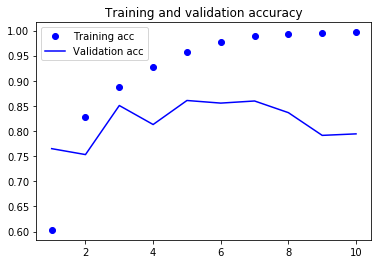

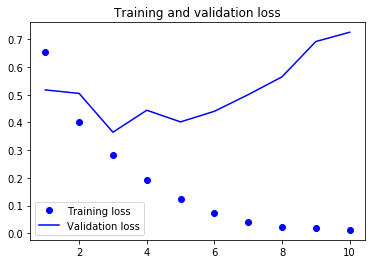

In [84]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# 기준 모델보다 성능이 높지 않네
# 처음 500개만 학습해서 그런듯
# 조금 더 고급층을 살펴보자
# simple rnn도 너무 긴 시간 텀끼리는 학습할 수 없나 봄

# LSTM(long short term memory)

In [0]:
# simple rnn에서 기울기 소실되는 것을 방지할 수 있음
# rnn에서는 층을 cell이라고 부름

In [88]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.5350 - acc: 0.7496 - val_loss: 0.4321 - val_acc: 0.8090
Epoch 2/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.3185 - acc: 0.8754 - val_loss: 0.3474 - val_acc: 0.8544
Epoch 3/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.2500 - acc: 0.9050 - val_loss: 0.3458 - val_acc: 0.8490
Epoch 4/10
20000/20000 [==============================] - 82s 4ms/step - loss: 0.2017 - acc: 0.9239 - val_loss: 0.2842 - val_acc: 0.8844
Epoch 5/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.1759 - acc: 0.9362 - val_loss: 0.3181 - val_acc: 0.8864
Epoch 6/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.1592 - acc: 0.9429 - val_loss: 0.3101 - val_acc: 0.8750
Epoch 7/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.1477 - acc: 0.9491 - val_loss: 0.3238 - val_acc:

In [89]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


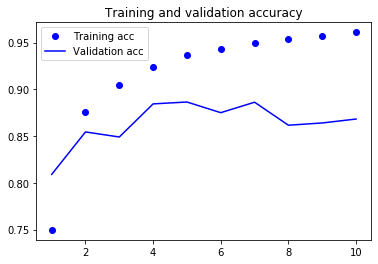

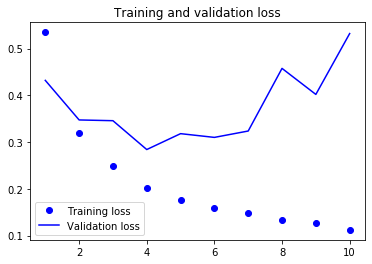

In [90]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# 전의 데이터
loss: 0.0122 - acc: 0.9965 - val_loss: 0.7254 - val_acc: 0.7944
# LSTM 결과
loss: 0.1123 - acc: 0.9610 - val_loss: 0.5322 - val_acc: 0.8682